Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, DenseNet121
from tensorflow.keras.layers import Input,Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

import os
import cv2

***Load Data***

In [2]:
def load_image_data(directory):
    images = []
    labels = []
    for label in sorted(os.listdir(directory)):
        for image in os.listdir(directory + "/" + label ):
            img = cv2.imread(directory + "/" + label+ "/" +image)
            img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,(240,240))
            images.append(img)
            labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return (images,labels)

In [6]:
# Delete all .DS_Store files in the specified directory and its subdirectories
!find /Users/kevlar/Desktop/SU24Research/app/oxford-flowers/test_dir/test_dir -name '.DS_Store' -type f -delete

In [7]:
X_train,y_train=load_image_data('/Users/kevlar/Desktop/SU24Research/app/oxford-flowers/test_dir/test_dir')

In [8]:
X_test, y_test = load_image_data('/Users/kevlar/Desktop/SU24Research/app/oxford-flowers/train_dir/train_dir')
X_val, y_val = load_image_data('/Users/kevlar/Desktop/SU24Research/app/oxford-flowers/valid_dir/valid_dir')

In [9]:
labels={'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 '2': 'hard-leaved pocket orchid',
 '54': 'sunflower',
 '66': 'osteospermum',
 '70': 'tree poppy',
 '85': 'desert-rose',
 '99': 'bromelia',
 '87': 'magnolia',
 '5': 'english marigold',
 '92': 'bee balm',
 '28': 'stemless gentian',
 '97': 'mallow',
 '57': 'gaura',
 '40': 'lenten rose',
 '47': 'marigold',
 '59': 'orange dahlia',
 '48': 'buttercup',
 '55': 'pelargonium',
 '36': 'ruby-lipped cattleya',
 '91': 'hippeastrum',
 '29': 'artichoke',
 '71': 'gazania',
 '90': 'canna lily',
 '18': 'peruvian lily',
 '98': 'mexican petunia',
 '8': 'bird of paradise',
 '30': 'sweet william',
 '17': 'purple coneflower',
 '52': 'wild pansy',
 '84': 'columbine',
 '12': "colt's foot",
 '11': 'snapdragon',
 '96': 'camellia',
 '23': 'fritillary',
 '50': 'common dandelion',
 '44': 'poinsettia',
 '53': 'primula',
 '72': 'azalea',
 '65': 'californian poppy',
 '80': 'anthurium',
 '76': 'morning glory',
 '37': 'cape flower',
 '56': 'bishop of llandaff',
 '60': 'pink-yellow dahlia',
 '82': 'clematis',
 '58': 'geranium',
 '75': 'thorn apple',
 '41': 'barbeton daisy',
 '95': 'bougainvillea',
 '43': 'sword lily',
 '83': 'hibiscus',
 '78': 'lotus',
 '88': 'cyclamen',
 '94': 'foxglove',
 '81': 'frangipani',
 '74': 'rose',
 '89': 'watercress',
 '73': 'water lily',
 '46': 'wallflower',
 '77': 'passion flower',
 '51': 'petunia'}

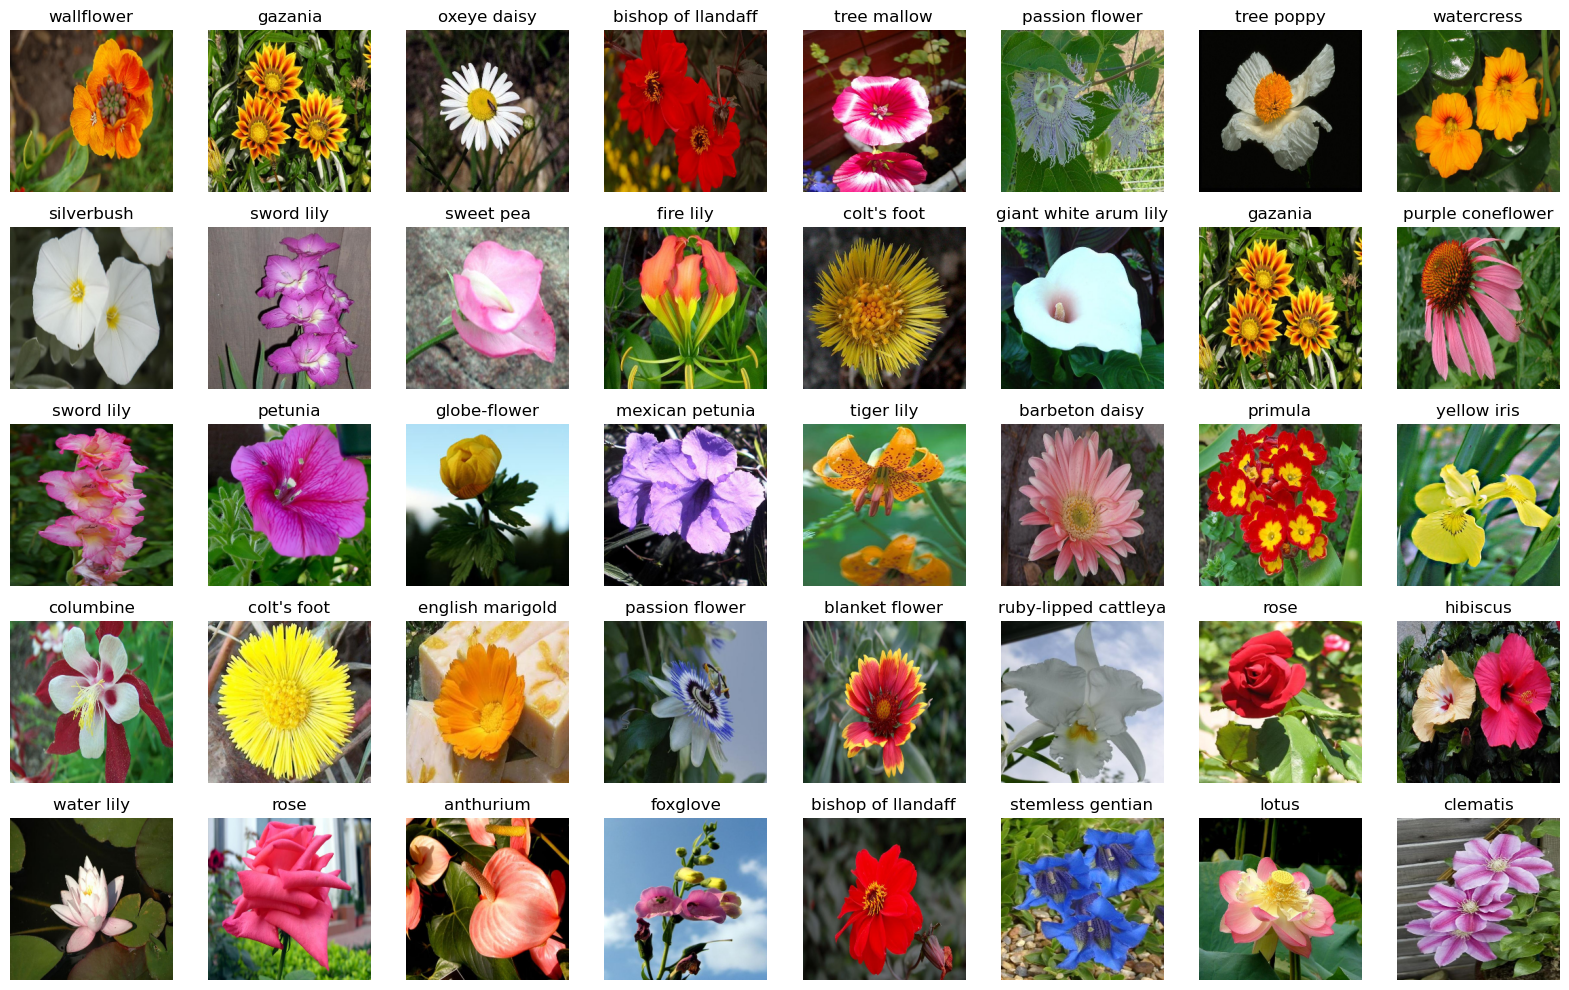

In [10]:
random_numbers = np.random.randint(1, len(X_train), 40)

fig, axes = plt.subplots(5, 8, figsize=(16, 10))

for i, ax in enumerate(axes.flat):
    n = random_numbers[i]
    image = X_train[n]
    label = labels[ y_train[n]]

    ax.imshow(image)
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val=X_val/255



label_binarizer = LabelBinarizer()
y_train_cat = label_binarizer.fit_transform(y_train)
y_test_cat = label_binarizer.transform(y_test)
y_val_cat = label_binarizer.transform(y_val)